In [1]:
# The code was removed by Watson Studio for sharing.

# The Spatial Configuration of Guesthouse and Hostel in Bangkok, Thailand

##### This project is the part of capstone project in the "Coursera IBM Data Science Professional specialization".

##### By Ty Wattana

## 1. Introduction

Bangkok is one of the top tourist destination cities in the world. In 2019, it was ranked to be the 1st
world&#39;s most-visited cities surpassing Paris and London with 22.78 million visitors. The city offers
the tourist many historical and cultural sights to see, dynamic nightlife shopping and relaxation.
However local experience travel is one of five travel trends for 2020, the travelers want to find
authentic experiences. Many travelers prefer privacy and a comfortable way of renting their own
accommodations in private apartments or houses. The hostel are the new trend of accommodation
for travelers who desire simple accommodation and local experience during their stay and also in
order to avoid crowded places and the tourist masses. Thus guesthouse and hostel promotion policy is essential for building new tourism
infrastructure to capture this new trend of tourism and also important for local economy.

This project aims to explore the neighborhood around hostel in Bangkok and cluster them
according to the venues surrounded by. The venues close to them indicate how guesthouse and hostel takes
advantage on their neighborhood and how travelers choose their local accomodation. For example, the
cluster with the highest number of hostel may have a lot of goods and services venue
category in their area while the other cluster with fewer hostel may facing an
absence of goods and services venue in their area. This data insight can indicate that food venues are essential
for establishing the local accomodation. City planners or
policymakers can use this analysis to form guesthouse promotion policy as well as local accomodation
entrepreneurs who can use this analysis to find the optimal location to settle their business.

## 2. Data Section

This project utilize Foursquare location data to perform analysis since it is an opensource platform and it has the data neccesary for this analysis. Foursquare is location technology platform that focus on tourism and city guild. By this nature, Foursquare suit well for this research as the data source. However Foursquare have some limitations in that most venues in this platform are in food shop and service categories which can make a bias in the result. Therefor future research may use Google place, Yalp or administrative data combine with Foursquare to have a better comprehensive and unbias analysis.

The neccesary data sets for this analysis consist of
    1. List of hostel in Bangkok and their geographical coordinates
    2. List of venue types surrounding each Hostels in 1000 metres radius

The 1000 metres radius was chosen because it is a reasonable walking distance.

## 3. Methodology

The methodology is divided into three major sections namely Data collection, Hostel cluster and Result Visualization. In data collection section, A list of hostel in Bangkok and a list of venue types surrounding each hostels in 1000 metres radius are gathered from Foursuare API using requests python library. In order to gather the most of the hostels in Bangkok, the request library are used to gather hostels data around the center of each district in 3000 meters radius. This data gathering method can cover most of the area in Bangkok. Thus gathering geographical coordinate of each center of Bangkok's districts is the prerequisite for hostel's data gathering process. The list of districts of Bangkok's data frame form wikipedia is the proper data source for this prerequisite process since python can gather this data very efficient using read_html library from pandas.io.html package and this data is somewhat reliable for the purpose. Although, there are some districts that geographical coordinate of their center are missing therefor geocoder liabary is used to automatically find those missing data. After hostels data is in the place, the nearby venue's data in 1000 meters of each hostels is collected by the same method used to collect hostel's data around center of each districts. All the data that is necessary for the later analysis are organize and preprocessed in pandas data frame. Details and coding of each step are in the result section.

In the clustering section, each hostels are assigned in to cluster using KMean method base on their nearby venue categories in 1000 meters radius. The distance uesed to calculate for KMean method is defined as average dummy encoding which has a value between 0 and 1 for each dimention or venue categories. For exaple, Hostel_1 may have 1 noodle house from all 10 venue categories nearby in 1000 meters radius. This mean Hostel_1 has 0.1 distances far from the full existence of noodle house. In other words, Hostel_1 has location of 0.1 on the noodle house dimention. Moreover, KMean method require one to determine a number of centroids before the calculation. Thus, the elbow method are used to determine the optimal number of centroids for this analysis. The KMean clustering in this project perform by KMeans library from sklearn.cluster python package.     

Another important process is data visualization. The main purpose of visualization is to get the better understand of the analysis. In this clustering analysis, visulization is uesed to illustrate how algorithm cluster all hostels in Bangkok. The tool for this purpose is folium library which is the python library for visualization of geographical information. In addition, pie chart and graph plot are also uesed for various analysis in this project as well by mainly utilizing matplotlib python package. Note that,this visualization process is not seperated into the stand alone part of analysis but infiltrate it both data collection and hostel clustering process.

## 4. Result

### 4.1 Data Collection

The data collection process start with the process of gathering all Bankok district data from Wikipedia and geocoder package. The result in Table 1 shows the name of all 49 districts with geographical coordinate of their center point. All hostels that locate near each center points in 3000 meters radius will be gathered as discuss in methodology section. Figure 1 illustrate the area that the data gathering process is cover. Note that in some large districts, Nong Chok for example, the 3000 meters radius is too small to cover most of its area. The reason why this occurs is that the area size data for each districts is not currently in place. Thus future research, when the data is in place, should set the radius for data collection according to the seize of each districts in order to cover most of the area possible.      

#### Import necesary libraries

In [2]:
!conda install -c conda-forge geocoder
!conda install -c conda-forge folium
import pandas as pd
import numpy as np
from pandas.io.html import read_html
import folium
import geocoder
from geopy.geocoders import Nominatim
import requests
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    ratelim-0.1.6              |             py_2           6 KB  conda-forge
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    geocoder:        1.38.1-py_1       conda-forge
    python_abi:    

#### Get the list of hostel in Bangkok

##### Seting up for Foursquare

In [4]:
# The code was removed by Watson Studio for sharing.

Client ID and Client secret have set


In [5]:
# Get Bangkok geographical coordinate for later used
address = "Bangkok, TH"

geolocator = Nominatim(user_agent= "B_explorer") # Identify user agent for deocoder
location = geolocator.geocode(address) # pick the location

# Assign geographical coordinate to variables

B_latitude = location.latitude
B_longitude = location.longitude

print('The geograpical coordinate of Bangkok are {}, {}.'.format(B_latitude, B_longitude))

The geograpical coordinate of Bangkok are 13.7538929, 100.8160803.


##### Get all Bangkok districts data

In [6]:
#read wikipedia table using read_html library
page = 'https://en.wikipedia.org/wiki/List_of_districts_of_Bangkok'
B_districs = read_html(page, attrs= {'class':'wikitable'}) # Assign result to a variable 
print('Extract {} wikitable'.format(len(B_districs))) # 

Extract 1 wikitable


In [7]:
# Take a look
B_districs = B_districs[0]
B_districs.head()

,District(Khet),Code,Thai,Population,No. ofSubdistricts(Khwaeng),Latitude,Longitude
0,Bang Bon,50,บางบอน,105161,4,NaN,NaN
1,Bang Kapi,6,บางกะปิ,148465,2,13.765833,100.647778
2,Bang Khae,40,บางแค,191781,4,13.696111,100.409444
3,Bang Khen,5,บางเขน,189539,2,13.873889,100.596389
4,Bang Kho Laem,31,บางคอแหลม,94956,3,13.693333,100.502500


##### Data preprocessing

In [8]:
B_districs.rename(columns= {"District(Khet)":"District"}, inplace= True) #Rename District column to contain only english name
B_districs.drop(["Code","Thai","No. ofSubdistricts(Khwaeng)","Population"], axis= 1, inplace= True) #Drop unnecessary columns

B_districs.head()

,District,Latitude,Longitude
0,Bang Bon,NaN,NaN
1,Bang Kapi,13.765833,100.647778
2,Bang Khae,13.696111,100.409444
3,Bang Khen,13.873889,100.596389
4,Bang Kho Laem,13.693333,100.502500


#### Get missing geographical coordinate data using Geocoder

In [9]:
for index, dis in zip(list(B_districs.index.values), B_districs["District"]): #loop through the table
    try: # set try-except clause to avoid some districts that geocoder cannot find the data
        # Geocoder data gathering process
        address = dis+", Bangkok, TH"
        geolocator = Nominatim(user_agent= "B_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude

        B_districs["Latitude"][index] = latitude
        B_districs["Longitude"][index] = longitude
    except: pass

B_districs

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,District,Latitude,Longitude
0,Bang Bon,13.666503,100.428859
1,Bang Kapi,13.778482,100.640875
2,Bang Khae,13.711932,100.422308
3,Bang Khen,13.846971,100.560648
4,Bang Kho Laem,13.693208,100.502427
5,Bang Khun Thian,13.602660,100.423803
6,Bang Na,13.668108,100.604614
7,Bang Phlat,13.793913,100.504772
8,Bang Rak,13.727354,100.527037
9,Bang Sue,13.802668,100.540281


#### Add geographical coordinate manually for a district that doesn't have information

## Table 1: list of all Bangkok district and its geographical coordinate

In [10]:
# There are one district that coordinate data is missing so let's assign it manually
B_districs["Latitude"][19] = 13.8271
B_districs["Longitude"][19] = 100.6743

B_districs

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,District,Latitude,Longitude
0,Bang Bon,13.666503,100.428859
1,Bang Kapi,13.778482,100.640875
2,Bang Khae,13.711932,100.422308
3,Bang Khen,13.846971,100.560648
4,Bang Kho Laem,13.693208,100.502427
5,Bang Khun Thian,13.602660,100.423803
6,Bang Na,13.668108,100.604614
7,Bang Phlat,13.793913,100.504772
8,Bang Rak,13.727354,100.527037
9,Bang Sue,13.802668,100.540281


In [108]:
# The code was removed by Watson Studio for sharing.

{'file_name': 'Bangkok Districts.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'capstoneproject-donotdelete-pr-r4yccdlgkakr9f',
 'asset_id': '83722c5f-e744-4dac-adcd-fc7864f46ea1'}

### Figure 1: Map of area that will be gathered hostels data

In [12]:
# visualize the area that will be gathered data
map = folium.Map(location=[B_latitude, B_longitude], zoom_start=10) # Create a folium map of Bangkok and assign the result to the variable map 

# loop through the B_districs to add markers of each district and add radius of data gathering
for dist, lat, lng in zip(B_districs["District"], B_districs["Latitude"], B_districs["Longitude"]):
    folium.Marker([lat, lng], popup= dist).add_to(map) # add marker with district's name popup
    folium.Circle([lat, lng], radius=3000).add_to(map) # add data gathering radius

    
map

#### Radius = 3000 look pretty good for this analysis since it cover most of the area.

### Get list of Hostels

In [11]:
local_acc_list = [] # create global empty list to store data  
special_dist_list = [] # create another list to find some districts with different data format 
radius = 3000 # assign radius for data gathering

# loop Foursquare API requests through Bangkok districts to get hostels data   
for dist, lat, lng in zip(B_districs["District"], B_districs["Latitude"], B_districs["Longitude"]):
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
        CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, "hostel", radius, LIMIT) # set url for requests
    
    local_acc = requests.get(url).json() # requests the data and assign it to variable local_acc
    try: #Set try-except to avoid data set with diffencet format
        local_acc = local_acc['response']['venues']
        local_acc_list.append([(L['name'],
                                L['location']['lat'],
                                L['location']['lng']) for L in local_acc])
        
    except:
        special_dist_list.append(dist) # Get the name of districts that have different data format
        
  
local_acc_df = pd.DataFrame([item for local_acc_list in local_acc_list for item in local_acc_list]) # create a data frame from local_acc list
local_acc_df.columns = ['Name', 'Latitude', 'Longitude'] # Assign columns name
local_acc_df.drop_duplicates(inplace= True) # Drop duplicate data

# See the result
print(local_acc_df.shape)
local_acc_df.head()

(412, 3)


,Name,Latitude,Longitude
0,Spinning Bear Hostel,13.780055,100.646339
1,Bangkok Center Hostel,13.758757,100.628782
2,Aimyish's hostel,13.714505,100.442049
3,Galato Coffee Hostel,13.851448,100.554353
4,P24 Hostel,13.837932,100.575459


In [13]:
# See if there any districts have a differnt data format
special_dist_list

[]

#### Fortunately, there are no district with different data format

### Figure 2: Map of Hostels in Bangkok

After collecting all hostels near each district centers in 3000 meters radius using Fouraquare API, The 412 hostels are gathered and figure 2 display each location of the hostels. Most of the hostel concentrate in the center of Bangkok namely in Yan Nawa, Samphanthawong, Ratchathewi and etc. Moreover, nearby venues of each hostels in 1000 meters radius are also being collected for the purpose clustering process. More than 30,000 venue's data are collected using the same methodology for hostel data collection.

In [14]:
# visualize the result
hostel_map = folium.Map(location=[B_latitude, B_longitude], zoom_start=10) # Create a folium map of Bangkok and assign the result to the variable hostel_map
#Add marker for each hostels using for loop

for name, lat, lng in zip(local_acc_df["Name"], local_acc_df["Latitude"], local_acc_df["Longitude"]):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=name,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(hostel_map)
    
hostel_map

### Explore near by venues around each hostels

In [15]:
venues_list = [] # create global empty list to store data
special_hostels_list = [] # create another list to find some venues_list with different data format
radius = 1000 # assign radius for data gathering

for hostel, lat, lng in zip(local_acc_df["Name"], local_acc_df["Latitude"], local_acc_df["Longitude"]):
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lng, 
        radius, 
        LIMIT)
    
    venues = requests.get(url).json() # Request data
    
    #Get only relevent data
    #Pass some venues that has different data format
    try:
        venues = venues['response']["groups"][0]['items']
        venues_list.append([(hostel,
                             lat, 
                             lng,
                             V['venue']['name'],
                             V['venue']['location']['lat'],
                             V['venue']['location']['lng'], 
                             V['venue']['categories'][0]['name']) for V in venues])
    except:
        continue

nearby_venues_df = pd.DataFrame([item for venues_list in venues_list for item in venues_list]) # create a data frame from venues_list
nearby_venues_df.columns = ['Hostel', 'Hostel Latitude', 'Hostel Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'] # Assign columns name

print(nearby_venues_df.shape)
nearby_venues_df.head()

(37002, 7)


,Hostel,Hostel Latitude,Hostel Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Spinning Bear Hostel,13.780055,100.646339,ข้าวซอยล้านนา,13.781328,100.642640,Thai Restaurant
1,Spinning Bear Hostel,13.780055,100.646339,ตี๋เตี๋ยวยำ (ก๋วยเตี๋ยวหมูต้มยำ),13.779177,100.648819,Noodle House
2,Spinning Bear Hostel,13.780055,100.646339,Khlong Chan Botanical Park (สวนพฤกษชาติคลองจั่น),13.777568,100.647554,Botanical Garden
3,Spinning Bear Hostel,13.780055,100.646339,Ko Boo Rod Sing (โกบู๊รสซิ่ง),13.774971,100.648642,Noodle House
4,Spinning Bear Hostel,13.780055,100.646339,ราชาบะหมี่เกี๊ยว,13.781514,100.641264,Noodle House


In [16]:
# The code was removed by Watson Studio for sharing.

{'file_name': 'Nearby Venues.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'capstoneproject-donotdelete-pr-r4yccdlgkakr9f',
 'asset_id': 'e0b0105b-52ac-41ae-8374-3e9a9985eb5c'}

### 4.2 Hostels Clustering

This process involve three major steps. The first step is dummy encoding. There are 311 nerby venue categories collecting from the prvious section which mean every hostels must have 311 dummy variables indicate whether that hostel have such venue categories in their nearby area in 1000 meters radius away or not. Each dummy variables will calculate in average of total nearby venues for each hostel as discuss before in methodology section. In the second process, all dummy variables are uesd to determine the optimal K in elbow method. Figure 3 shows the result of elbow method which is the iteration process of KMean clustering using former dummies as an input through K = 1 to k = 20. The result suggest that k = 4 is the point where distoration of KMean most drastically drop (Elbow point). This mean k = 4 is the optimal k for this analysis. Thereafter in the last section, all hostels are assigned into four clusters (k = 4) namely Cluster 0, Cluster 1, Cluster 2 and Cluster 3 using KMean method.     

Figure 4 shows the result of the clustering process. Hostels in Cluster 0 located in the center of Bangkok and most of them located near BTS sky train system. Hostels in Cluster 1 and Cluster 2 locate around Cluster 0 area. Hostels in Cluster 1 mostly located in the westside of the center of Bangkok while hostels in Cluster 2 located in the eastside. Some of these hostels in Cluster 1 and Cluster 2 located near the international airports and remote BTS sky train stations. Cluster 3, on the other hand, unique from others clusters in that hostels in this cluster concentrate in the reletively small area even the number of hostels are very similar to cluster 2. This area is one of the famous tourist attraction in Bangkok called "Kho san" road where tourist can find any kind of experince from Thai temple to night bar. Thus it is reasonable for many entreprenuers to settle their hostel business in this area and create such a unique hostel cluster.

#### Encode dummy variables for each nearby venues of each hostels

In [17]:
Hostel_onehot = pd.get_dummies(nearby_venues_df[['Venue Category']], prefix="", prefix_sep="") # Dummy encoding

# add hostel column to new dummy dataframe
Hostel_onehot['Hostel'] = nearby_venues_df['Hostel'] 

# move hostel column to the first column
Hostel_onehot.set_index("Hostel", inplace= True)
Hostel_onehot.reset_index(inplace= True)
Hostel_onehot.head()

,Hostel,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Zoo,Zoo Exhibit
0,Spinning Bear Hostel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Spinning Bear Hostel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Spinning Bear Hostel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Spinning Bear Hostel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Spinning Bear Hostel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Groupby hostels using mean operation to get average distance value for each hostels. 

In [18]:
#Group by Hostel with mean operation
Hostel_grouped = Hostel_onehot.groupby('Hostel').mean().reset_index()
Hostel_grouped.head()

,Hostel,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Zoo,Zoo Exhibit
0,'Go!' Bangkok Hostel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,168 Hostel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1819 Hostel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1989 Cafe & Hostel Bangkok,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1989 Hostel & Cafe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cluster the hostels using Kmean method

### Figure 3: The Elbow Method ressult

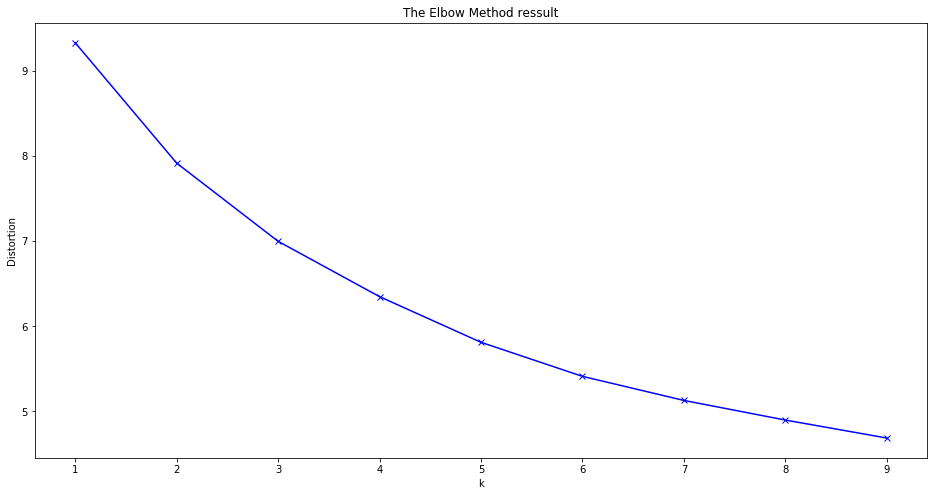

In [19]:
#Iterate the Kmean clustering
distortions = [] # Create empty list to store KMean distortion data from each k
K = range(1,10) # Define range of k for Iteration process  

Hostel_clustering = Hostel_grouped.drop('Hostel', 1)

#loop KMean clustering through k = range(1,10) and append distortion to distortion list 
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(Hostel_clustering)
    distortions.append(kmeanModel.inertia_)

#Plot the result to find elbow point

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method ressult')
plt.show()

### It seems that k = 4 is an optimal k even it's not very obvious 

### Kmean clustering k = 4

In [20]:
# Define number of cluster
kclusters = 4

kmeanModel = KMeans(n_clusters=kclusters, random_state=0).fit(Hostel_clustering) # KMean clustering using Hostel_clustering data

# check cluster labels generated for each row in the dataframe
kmeanModel.labels_[0:10]

array([3, 1, 0, 0, 1, 3, 1, 1, 2, 2], dtype=int32)

## Assign Cluster to each hostel

### Preprocessing data

In [22]:
# Assign cluster back in data frame

Hostel_venue_cat = Hostel_onehot.groupby('Hostel').sum().reset_index() # Create new data frame that sum up all venues around each hostel for later analysis
Hostel_venue_cat.insert(1, "Cluster Labels", kmeanModel.labels_) # Insert cluster to new data frame

Hostel_venue_cat.head()

,Hostel,Cluster Labels,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Zoo,Zoo Exhibit
0,'Go!' Bangkok Hostel,3,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,168 Hostel,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1819 Hostel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1989 Cafe & Hostel Bangkok,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1989 Hostel & Cafe,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [23]:
#Get lat lng of each Hostels for later mapping
Hostel_df = nearby_venues_df.drop(["Venue", "Venue Latitude", "Venue Longitude", "Venue Category"], axis= 1, )
Hostel_df.drop_duplicates(inplace= True)

#Merge the data frames
Hostel_Merged = pd.merge(Hostel_df, Hostel_venue_cat, on="Hostel")

Hostel_Merged.head()

,Hostel,Hostel Latitude,Hostel Longitude,Cluster Labels,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,...,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Zoo,Zoo Exhibit
0,Spinning Bear Hostel,13.780055,100.646339,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bangkok Center Hostel,13.758757,100.628782,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Aimyish's hostel,13.714505,100.442049,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Galato Coffee Hostel,13.851448,100.554353,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,P24 Hostel,13.837932,100.575459,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### Figure 4: Map of hostels cluster

In [24]:
# Create a Bangkok folium map
cluster_map = folium.Map(location=[B_latitude, B_longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, hostel, cluster in zip(Hostel_Merged['Hostel Latitude'], Hostel_Merged['Hostel Longitude'], Hostel_Merged['Hostel'], Hostel_Merged['Cluster Labels']):
    label = folium.Popup(str(hostel) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(cluster_map)


cluster_map

### 4.3 Result visualization

The result as shown in figure 5 shows that most of the hostels are fall into cluster 0 with the proportion of 41.7% from total hostels. Cluster 1 is the second cluster with most percentage of hostels which is 27.7% from total. Cluster 2 and Cluster 3 share the very similar proportion of hostels in the percentage of 15.5% and 15.0% respectively. Each clusters have different characteristic in terms of their surrounding venues. Cluster 0 have hotels as it most common venues followed by coffee shop and restaurant as shown in Figure 6. Cluster 1 is the opposite from Clsuter 0. Noodle house is the most common venue in this cluster following with other kind of restaurant while hotel fall behind in 6th placed as shown in Figure 7. Cluster 2 have a very similar characteristic to Cluster 1 but it has coffe shop as its top most common venues and also has convenience store as its second top most common venues. Cluster 3 have a unique characteristic in that it has bar as it top most common venue followed by Thai restaurant, hotel and other kind of restaurant.   

### Figure 5: Proportion of cluster assigned

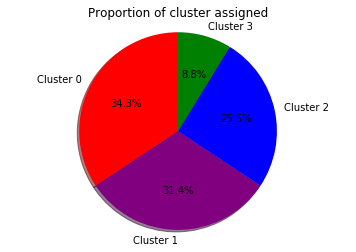

In [25]:
# Create pie chart to visualize the proportion of clusters

labels = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"] # Assign labels for each cluster
sizes = Hostel_Merged["Cluster Labels"].value_counts() # Set sizes input for pie chart

fig1, ax1 = plt.subplots() # Create figure object
ax1.pie(sizes, labels=labels, colors= ['red', 'purple', 'blue', 'green'], autopct='%1.1f%%',shadow=True, startangle=90) # Create pie chart with colors respect to the map
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Proportion of cluster assigned") # Set title
plt.show()

## Analyze Characteristic of the Clusters

### Preprocessing Data

In [26]:
#Get cluster charater table

cluster_char = Hostel_Merged.drop(['Hostel', 'Hostel Latitude', 'Hostel Longitude'], axis= 1) # create new data frame using some columns in Hostel_Merged data frame 
cluster_char = cluster_char.groupby("Cluster Labels").sum().reset_index() # Group by cluster using sum operation to get the number of each venues categories in each cluster

#Add "Cluster" text to each cluster number
cluster_char['Cluster Labels'] = 'Cluster ' + cluster_char['Cluster Labels'].astype(str)
cluster_char.head()

,Cluster Labels,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Zoo,Zoo Exhibit
0,Cluster 0,16.0,14.0,22.0,1.0,51.0,58.0,8.0,0.0,1.0,...,3.0,7.0,4.0,1.0,7.0,0.0,2.0,3.0,3.0,0.0
1,Cluster 1,5.0,5.0,10.0,0.0,15.0,15.0,0.0,14.0,0.0,...,0.0,19.0,30.0,0.0,18.0,13.0,61.0,27.0,0.0,1.0
2,Cluster 2,1.0,1.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cluster 3,0.0,2.0,2.0,0.0,0.0,2.0,1.0,3.0,5.0,...,1.0,63.0,28.0,0.0,2.0,0.0,29.0,4.0,0.0,0.0


In [27]:
#Transpose data frame for pie chart
cluster_char.set_index("Cluster Labels", inplace= True)
cluster_char = cluster_char.transpose()
cluster_char.head()

Cluster Labels,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Accessories Store,16.0,5.0,1.0,0.0
Airport,14.0,5.0,1.0,2.0
Airport Food Court,22.0,10.0,0.0,2.0
Airport Gate,1.0,0.0,0.0,0.0
Airport Lounge,51.0,15.0,0.0,0.0


In [28]:
# Get only top 10 common venue for each cluster

#Cluster0
Cluster0_top10 = cluster_char["Cluster 0"].to_frame()
Cluster0_top10.sort_values(by=['Cluster 0'], ascending=False, inplace= True) #Sort values for most common venues
Cluster0_top10 = Cluster0_top10[:10] # Get only first ten most common venues
Cluster0_top10.reset_index(inplace = True) # reset index
Cluster0_top10.rename(columns= {"index": "Venues"},inplace= True) # Give a name to venue column

#Cluster1
Cluster1_top10 = cluster_char["Cluster 1"].to_frame()
Cluster1_top10.sort_values(by=['Cluster 1'], ascending=False, inplace= True)
Cluster1_top10 = Cluster1_top10[:10]
Cluster1_top10.reset_index(inplace = True)
Cluster1_top10.rename(columns= {"index": "Venues"},inplace= True)

#Cluster2 
Cluster2_top10 = cluster_char["Cluster 2"].to_frame()
Cluster2_top10.sort_values(by=['Cluster 2'], ascending=False, inplace= True)
Cluster2_top10 = Cluster2_top10[:10]
Cluster2_top10.reset_index(inplace = True)
Cluster2_top10.rename(columns= {"index": "Venues"},inplace= True)

#Cluster3
Cluster3_top10 = cluster_char["Cluster 3"].to_frame()
Cluster3_top10.sort_values(by=['Cluster 3'], ascending=False, inplace= True)
Cluster3_top10 = Cluster3_top10[:10]
Cluster3_top10.reset_index(inplace = True)
Cluster3_top10.rename(columns= {"index": "Venues"},inplace= True)

In [29]:
#Take a look at Cluster 0 top 10 common venues
Cluster0_top10

,Venues,Cluster 0
0,Convenience Store,779.0
1,Coffee Shop,666.0
2,Noodle House,526.0
3,Thai Restaurant,500.0
4,Café,402.0
5,Hotel,307.0
6,Japanese Restaurant,247.0
7,Som Tum Restaurant,197.0
8,Fast Food Restaurant,196.0
9,Asian Restaurant,154.0


### Visualize the result

#### Define the function that create the bar chart

In [30]:
#Define the bar chart function
def bar_chart(df, cluster, color):
    ax = df.plot.bar(x= "Venues", y=cluster, rot=0, figsize = (25,10), color=color) # Create bar chart for top 10 common venues
    ax.set_title("Top 10 venues in {}".format(cluster))

#### Figure 6: Top 10 common venues in cluster 0

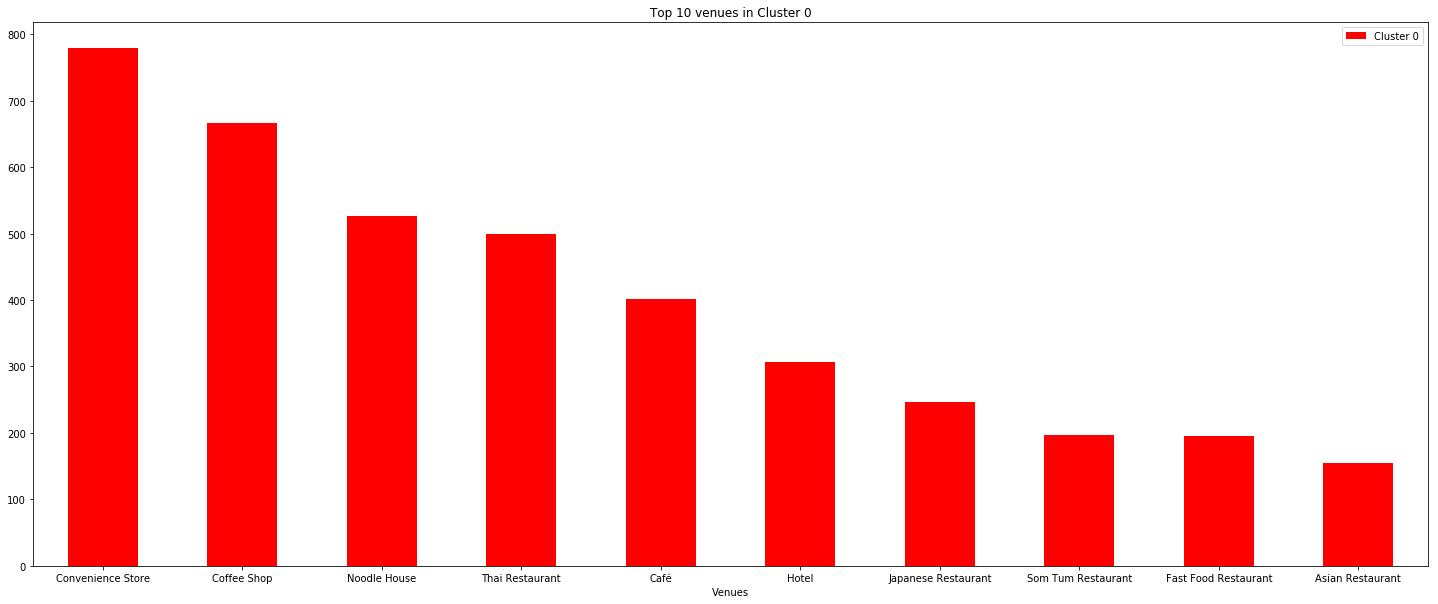

In [31]:
bar_chart(df=Cluster0_top10, cluster='Cluster 0', color= 'r')

#### Figure 7: Top 10 common venues in cluster 1

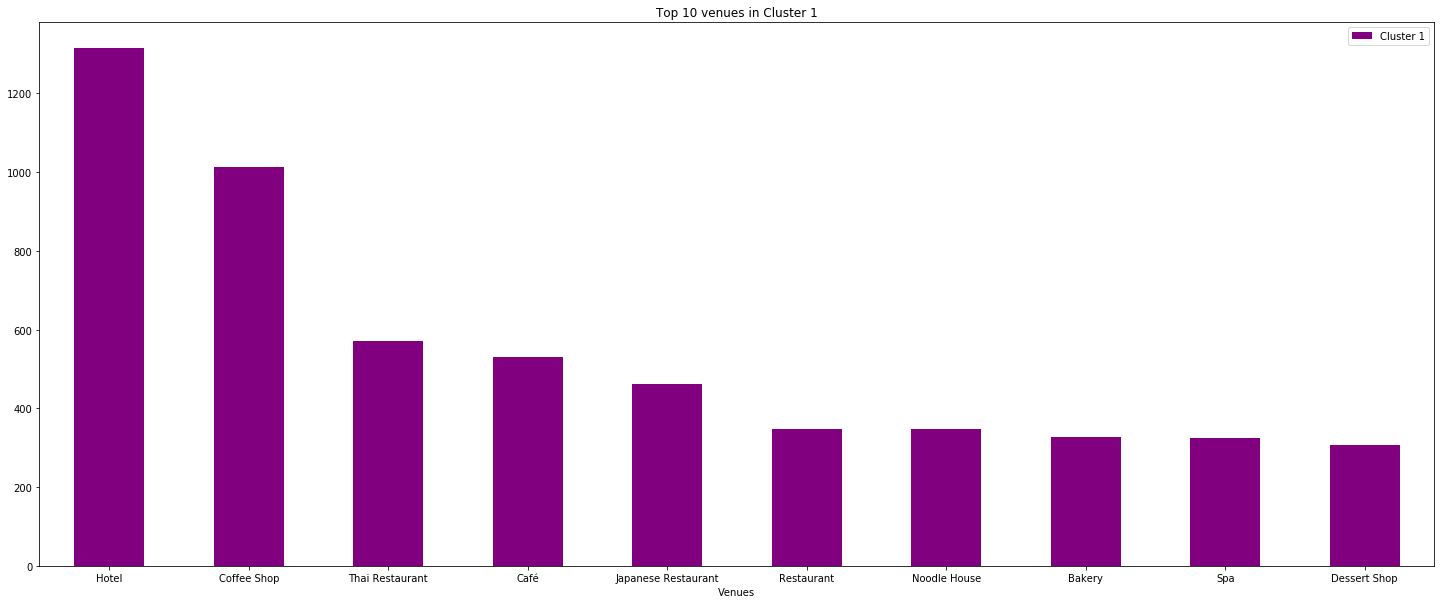

In [32]:
bar_chart(df=Cluster1_top10, cluster='Cluster 1', color= 'purple')

#### Figure 8: Top 5 common venues in cluster 2

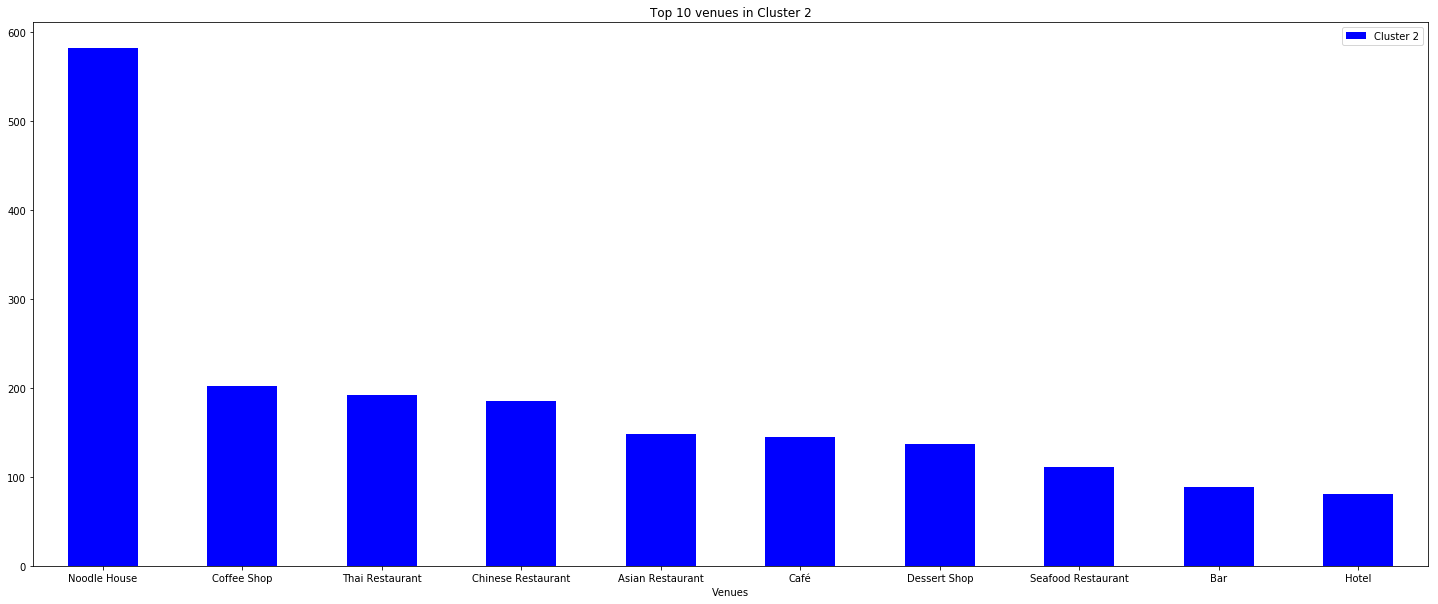

In [33]:
bar_chart(df=Cluster2_top10, cluster='Cluster 2', color= 'b')

#### Figure 9: Top 5 common venues in cluster 3

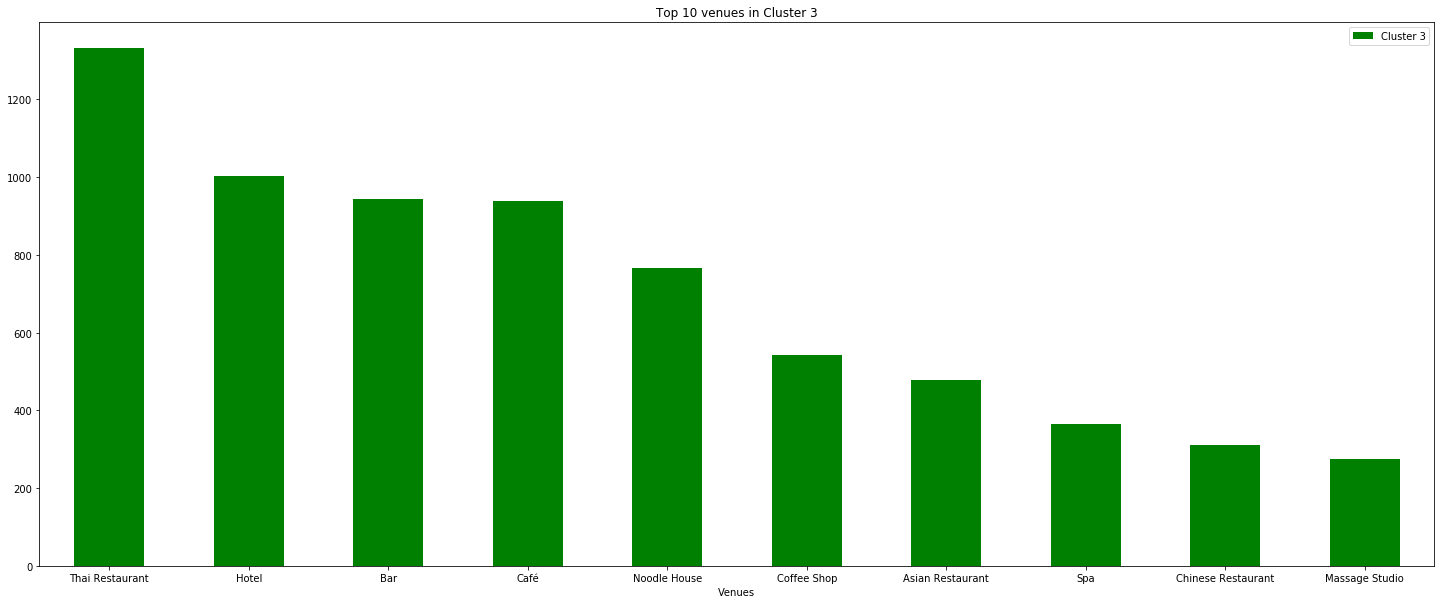

In [34]:
bar_chart(df=Cluster3_top10, cluster='Cluster 3', color= 'g')

## 5. Discussion

According to the result in the above section, it seems that food venues such as Thai restaurant, noodle house, coffee shop and etc. have a significant role as a good environment for hostel business in Bangkok since it appear to be the most common venues in every clusters. Bar is another venue category that very common in every cluster especially in Cluster 3. Another interesting observation is that hotel is also the very common venues in every cluster especially in Cluster 0. There are several explainations for this occurance. First, both hostels and hotel are very similar business so they take similar advantage over similar locations, as a result hostel and hotel coexist in the same location. Second, it is possible that hotels are contribute to the growth of nearby business such as Thai restaurant, noodel house, coffee shop, bar and etc. and these nearby business are essential for hostel. Therefor this led the hostel entrepreneuers to set their hostel near hotel to gain this advantage. Third, hostel and hotel might not be the direct business rival because they have differnt target groups. Hotel have a high perchasing power turist who love comfortable as their main target group while hostel have  travelers who want local experience as the main target. Thus both hostel and hotel can exploit their location advantage without having to significantly compete with one another.        

In addition, according to the configuration of hostels shown in figure 4, many hostels take advantage over infrastructure such as skytrain and international airports. Moreover, in the outer area of Bangkok, there are just a few hostels that can operate except for those area where skytrain or international airport exist. Thus, these infrastructures are also the important factors for hostel business.  

## 6. Limitation and Suggestion for future research

This research has two major limitations that need to be considered and need to be improve in the next research. These limitations are

    1. Foursquare limitation: As mentioned above, Foursqure is a location technology platform that focus on tourism and has a majority of venues data of food shop and service venues categories. This can lead to the bias on the result of this research. Future research should utilize multiple data source such as Google place, Yalp or administrative data combine with Foursquare to overcome this limitation.
    2. Methodology limitation: This research has limitation in both Data gathering process and clustering process. In data gathering process, hostels in 3000 meters radius away from the centers of each districts in Bangkok are gathered. This method have left some major areas in some districts unexplore. Future research have to apply different method to overcome this limitation for example by adjusting the radius accoring to each districts size. In clustering process, KMean clustering algorithm treat every venue equally even some venue are much more important than the other. For example, one ice cream shop and one BTS skytrain staion are equally important for KMean algorithm. In order to have a better understand about configuration of hostels in Bangkok, future research have to design the methodology that can overome this limitation.    